In [59]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

### Data preprocessing



In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### Building the CNN model

In [62]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [64]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')


mc = ModelCheckpoint('./Aikins_cnn_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


cb = [es, mc]

### Training the model

In [65]:
model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8251 - loss: 0.5550
Epoch 1: val_accuracy improved from -inf to 0.96928, saving model to ./Aikins_cnn_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8255 - loss: 0.5539 - val_accuracy: 0.9693 - val_loss: 0.1019
Epoch 2/50
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9686 - loss: 0.1026
Epoch 2: val_accuracy improved from 0.96928 to 0.97928, saving model to ./Aikins_cnn_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9686 - loss: 0.1026 - val_accuracy: 0.9793 - val_loss: 0.0653
Epoch 3/50
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - loss: 0.0744
Epoch 3: val_accuracy improved from 0.97928 to 0.98300, saving model to ./Aikins_cnn_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9770 - loss: 0.0744 - val_accuracy: 0.9830 - val_loss: 0.0562
Epoch 4/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9829 - loss: 0.0568
Epo

### Save Model

In [66]:
model.save('Aikins_cnn_model.keras')

### Making predictions and evaluating the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


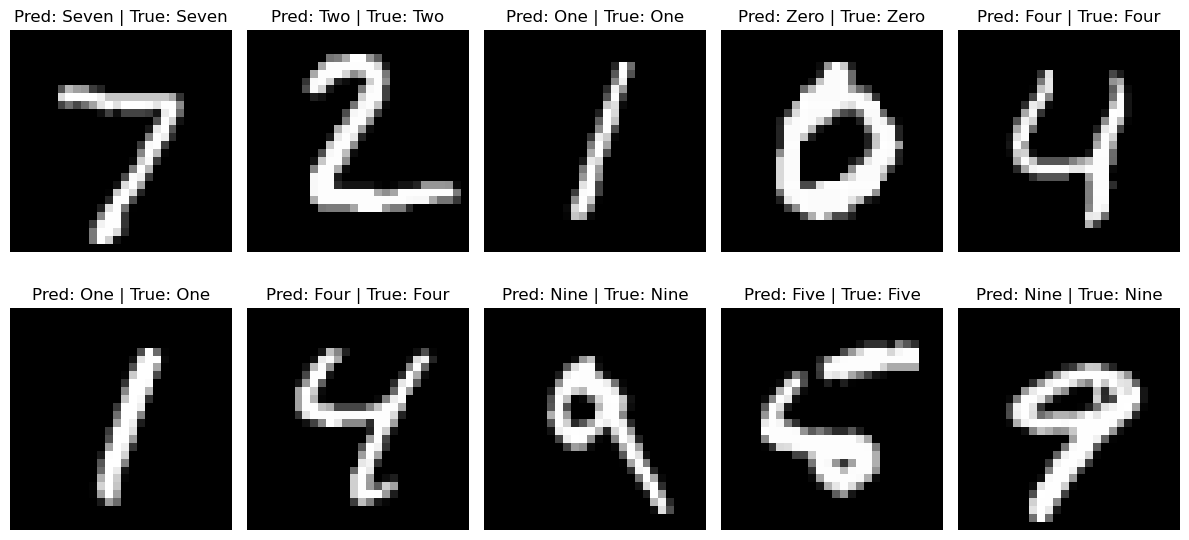

In [67]:
labels = {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 
          5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'}

predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

predicted_text_labels = [labels[label] for label in predicted_labels]
true_text_labels = [labels[label] for label in true_labels]

def display_predictions(images, true_labels, predicted_labels, num=10):
    plt.figure(figsize=(12, 6))
    for i in range(num):
        plt.subplot(2, num // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_labels[i]} | True: {true_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


display_predictions(X_test, true_text_labels, predicted_text_labels, num=10)




In [68]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.9914 - loss: 0.0306
Test Accuracy: 99.14%


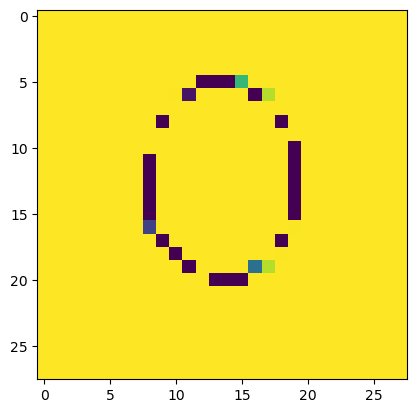

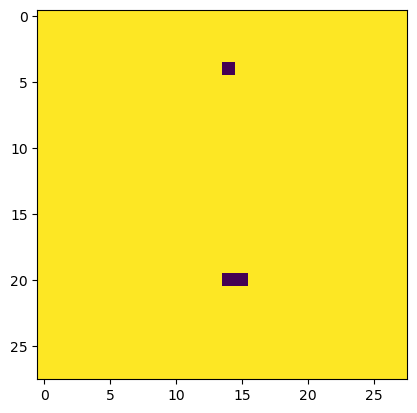

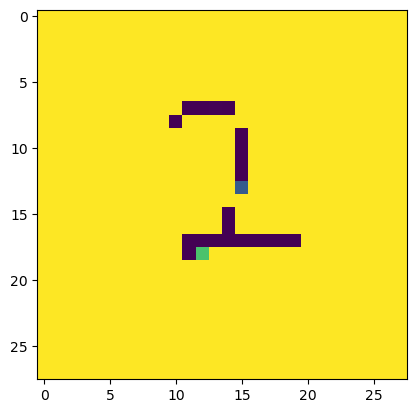

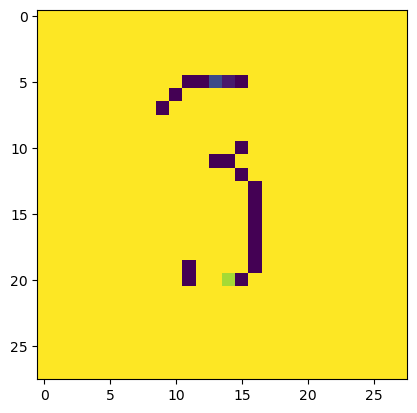

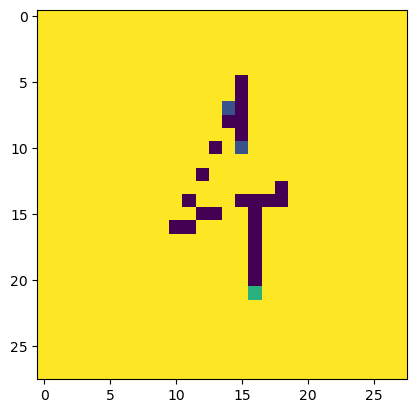

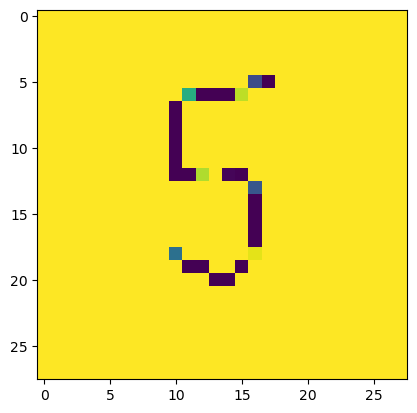

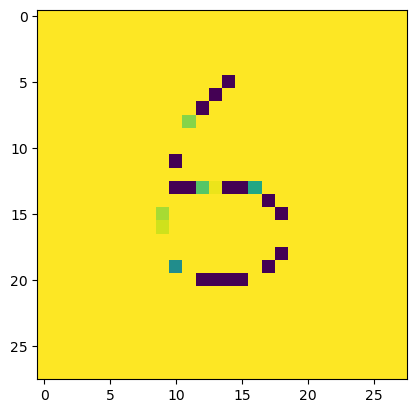

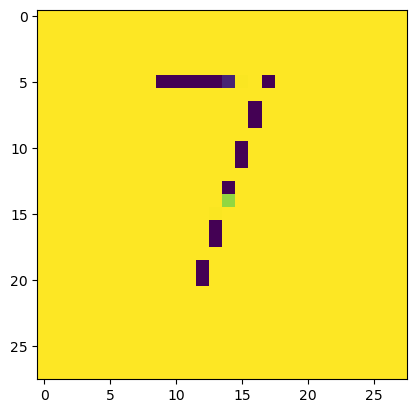

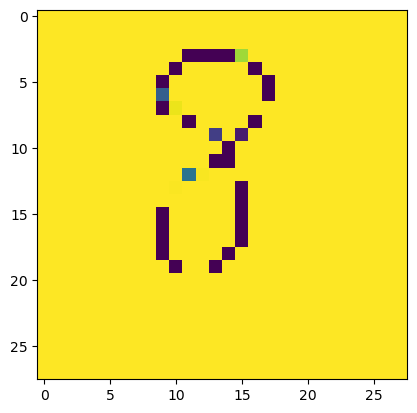

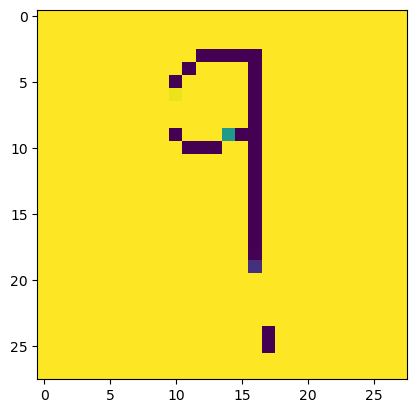

In [84]:
import numpy as np
import cv2
from keras.models import load_model

import matplotlib.pyplot as plt

MODEL = load_model('Aikins_cnn_model.keras')



def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's requirements.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (28, 28))

    img = img / 255.0
    # img = img.reshape(1, 28, 28, 1)
    
    return img

for i in range(10):
    image_path = f'dataset/{i}.jpg'
    processed_image = preprocess_image(image_path)
    plt.imshow(processed_image)
    plt.show()


def predict_digit(image_path):
    """
    Predict the digit in the input image.
    """
    LABELS = {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 
          5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'}
    processed_image = preprocess_image(image_path)

    prediction = MODEL.predict(processed_image)

    predicted_label = np.argmax(prediction)

    return LABELS[predicted_label]

# for i in range(10):
#     image_path = f'dataset/{i}.jpg'
#     predicted_digit = predict_digit(image_path)
#     print(f"True Digit: {i} | Predicted Digit: {predicted_digit}")

